## Library

In [35]:
import pandas as pd

## Load Dataset

In [36]:
file_path = '/Users/nychanthrith/data-science-project/data/Clean data/cleaned_data_January.csv'
data = pd.read_csv(file_path)

## Library

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

## Drop the month, day, time of day, and target

In [38]:
X = data.drop(columns = ['Month', 'Day', 'Time of Day', 'Target'])
y = data['Target']

## Scale data

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Split Data into Training and Testing Sets
- Split the dataset into 80% training and 20% testing.
- `random_state=42` ensures reproducibility.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Train the Decision Tree Model
- `DecisionTreeClassifier`: Builds the decision tree.
    - `max_depth=10`: Limits the tree depth to prevent overfitting.
    - `criterion='gini'`: Splits nodes using the Gini Impurity metric.
    - `random_state=42`: Ensures consistent results.
- `fit(X_train, y_train)`: Trains the decision tree model using the training data.

In [41]:
dt = DecisionTreeClassifier(max_depth=10, criterion='gini', random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

## Extract Feature Importance

In [42]:
# feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': dt.feature_importances_})
# feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
feature_importance = dt.feature_importances_
features = data.drop(columns = ['Month', 'Day', 'Time of Day', 'Target']).columns

## Show Features

In [43]:
features

Index(['Index', 'pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Source',
       'Water Temperature', 'Air Temperature'],
      dtype='object')

## Library

In [44]:
import matplotlib.pyplot as plt

## Plot to find which features are important
- `plt.barh`: Plots a horizontal bar graph.
- `features`: The feature names on the y-axis.
- `feature_importance`: Importance scores for each feature on the x-axis.

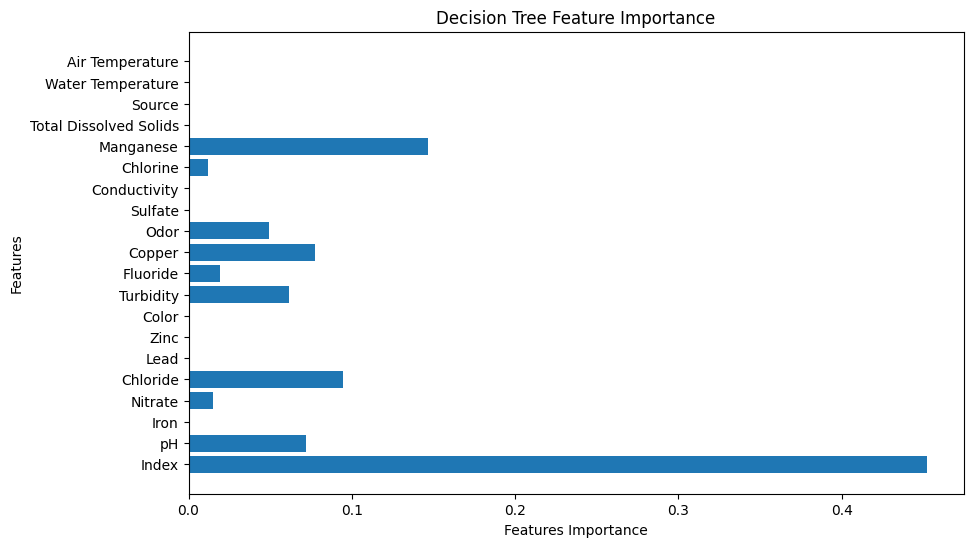

In [45]:
plt.figure(figsize=(10, 6))
plt.barh(features, feature_importance)
plt.xlabel('Features Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.show()

## Test features and Finding accuracy with `Index` and without `Index` column

In [46]:
importance_features = ['Index', 'pH', 'Nitrate', 'Chloride', 'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Chlorine', 'Manganese']
X_reduced = data[importance_features]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with reduced features: {accuracy:.4f}")

Accuracy with reduced features: 0.9814


In [48]:
importance_features_without_index = ['pH', 'Nitrate', 'Chloride', 'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Chlorine', 'Manganese']
X_reduced = data[importance_features_without_index]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with reduced features: {accuracy:.4f}")

Accuracy with reduced features: 0.8611


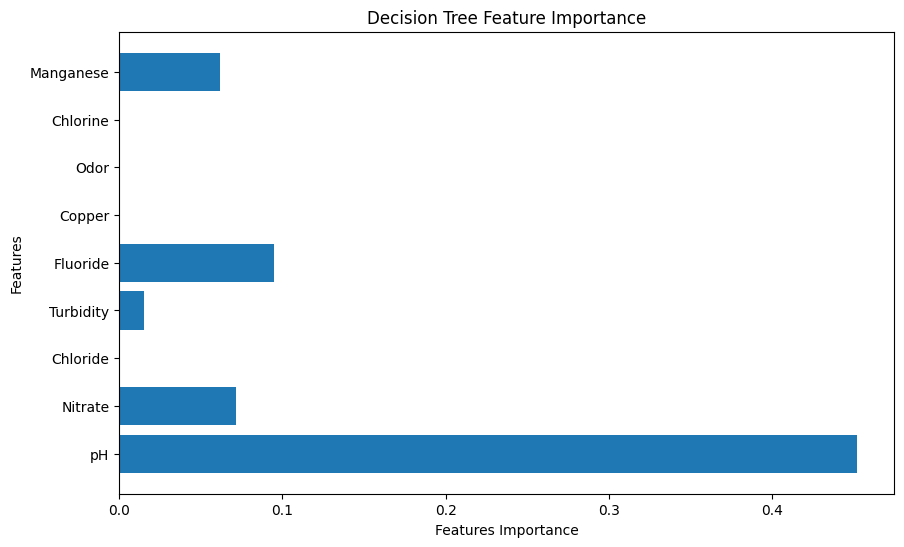

In [50]:
plt.figure(figsize=(10, 6))
plt.barh(importance_features_without_index, feature_importance[:len(importance_features_without_index)])
plt.xlabel('Features Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.show()